# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: [Global-ai-tool-adoption-across-industries]
## Grupo: [B]
## Autor: [Antonio Calzadilla Miranda]
## Matrícula: [263861]
## Fecha: [09/09/2025]

# **1. Introducción**

## - Descripción del problema: ¿- ¿Qué factores (industria, país, tamaño de empresa, grupo de edad) predicen que una empresa estará en el top 5% de adopción de tecnologias de AI? Es posible predecir si una empresa estara en baja, media o alta adopcion analizando unicamente sus caracteristicas?
## - Objetivo del análisis: Identificar factores que influyen en la adopcion de tecnologias de AI y el impacto que estas tecnologias pueden tener en el desempeno de las empresas.
## - Fuente de datos: https://www.kaggle.com/datasets/tfisthis/global-ai-tool-adoption-across-industries


# **2. Captura y Carga de Datos**

## - Explicación de la fuente de datos: https://www.kaggle.com/datasets/tfisthis/global-ai-tool-adoption-across-industries,

##¿Qué formato tienen los datos (XLS)?, ¿Cuántas observaciones y variables contiene el dataset? 9 variables y 145,000 observaciones

## - Explicación sobre problemas en la carga de Datos y el Código para la carga de datos desde archivos (El archivo se cargo en Drive.google.com y desde esa pagina web se abrio en Colab, donde a traves del comando from google.colab import drive drive.mount('/content/drive') se pudo cargar el archivo y usando la libreria Pandas se pudo analizar, identificar datos nulos, conocer las caracteristicas del dataset, revisar las columnas que no aportaban informacion util. Ademas se utilizaron las librerias Plotly, matplotlib y seaborn para generar graficos. Dado que el dataset no presenta datos atipicos se procedio a analizar los valores extremos de la columna Adoption Rate para identificar tendencias.)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
  #Importamos la librería de pandas y asignamos un alias (pd)
  import pandas as pd

  # Leemos el archivo que contiene comas
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Programacion /Semana 06 Proyecto/ai_adoption_dataset.csv")
  #imprimimos el nombre de las columnas
  print(df.columns)

  #Convertimos los nombres de las columnas a minúsculas
  df.columns = df.columns.str.lower()

  #imprimimos el nombre de las columnas
  print(df.columns)

#imprimimos el nombre de las columnas
print(df.head())

Index(['country', 'industry', 'ai_tool', 'adoption_rate', 'daily_active_users',
       'year', 'user_feedback', 'age_group', 'company_size'],
      dtype='object')
Index(['country', 'industry', 'ai_tool', 'adoption_rate', 'daily_active_users',
       'year', 'user_feedback', 'age_group', 'company_size'],
      dtype='object')
     country        industry           ai_tool  adoption_rate  \
0        USA      Technology           ChatGPT          40.45   
1     France   Manufacturing        Midjourney          35.72   
2  Australia  Transportation           ChatGPT          13.47   
3         UK   Manufacturing           ChatGPT          48.46   
4         UK     Agriculture  Stable Diffusion          34.06   

   daily_active_users  year  \
0                2461  2023   
1                8496  2024   
2                8641  2024   
3                3488  2023   
4                1124  2024   

                                       user_feedback age_group company_size  
0  YyvLXOFyevRMS

#**3.Transformación y Preprocesamiento - Data Wrangling**

## - Identificación de Tipos de Datos
- COUNTRY -	Pais donde la organizacion esta localizada (e.g., USA, India, China, etc.)

- INDUSTRY - Sector industrial al que pertenece la organizacion(e.g., Tecnologia, Salud, Menudo, etc.)

- AI TOOL -	Nombre de la herramienta de AI utilizada(e.g., ChatGPT, Midjourney, Bard, Stable Diffusion, Claude)

- ADOPTION RATE - Porcentaje representativo de la tasa de adopcion de la herramienta de AI dentro del sector o de la compania (0–100)

- DAILY ACTIVE USERS -	Numero estimado de usuarios activos diariamente de la herramienta de AI en el contexto dado.

- YEAR -	Anio en el cual los datos fueron registrados (2023 or 2024)

- USER FEEDBACK - Retroalimentacion en texto libre por parte de los ususarios acerca de sus experiencias con la herramienta AI (Hasta 150 caracteres)

- AGE GROUP - Rangos de los grupos de usuarios(e.g., 18-24, 25-34, 35-44, 45-54, 55+)

- COMPANY SIZE - Categoria de la empresa por su tamano (Startup, SME ((Small to Medium-sized Enterprise)), Enterprise)

## - Cantidad de Valores nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   country             145000 non-null  category
 1   industry            145000 non-null  category
 2   ai_tool             145000 non-null  category
 3   adoption_rate       145000 non-null  float64
 4   daily_active_users  145000 non-null  float64
 5   year                145000 non-null  int64   
 6   user_feedback       145000 non-null  object  
 7   age_group           145000 non-null  object  
 8   company_size        145000 non-null  object  
dtypes: category(3), float64(2), int64(1), object(3)


##- Explicación sobre cada una de las problemáticas encontradas, las soluciones y el código

Dado que el dataset esta normalizado y los valores atipicos estan muy limitados no se encontro ningun problema de valores nulos sin embargo la columna de user feedback muestra datos sin sentido, al parecer los usuarios a los que se solicito retroalimentacion solo ingresaron teclearon letras sin buscar dar una opinion, por lo que esta columna se removio.

Sobre la naturaleza de los datos, originalmente solo la variable adoption_rate era tipo de dato float64, todas las demas variables eran object, por lo cual se decidio modificar el tipo de dato de la variable daily_active_users a float64 para que se tuvieran dos variables numericas y todas las demas variables se cambiaron a category a fin de clasificar y predecir comportamientos.

In [4]:
print(df.dtypes)

country                object
industry               object
ai_tool                object
adoption_rate         float64
daily_active_users      int64
year                    int64
user_feedback          object
age_group              object
company_size           object
dtype: object


In [5]:
# Convertir adoption_rate a float
df['adoption_rate'] = df['adoption_rate'].astype(float)

# Convertir daily_active_users a float
df['daily_active_users'] = df['daily_active_users'].astype(float)

# Convertir country a tipo categórico
df['country'] = df['country'].astype('category')

# Convertir Industry a tipo categórico
df['industry'] = df['industry'].astype('category')

# Convertir AI Tool a tipo categórico
df['ai_tool'] = df['ai_tool'].astype('category')

In [6]:
df.drop('user_feedback', axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145000 entries, 0 to 144999
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   country             145000 non-null  category
 1   industry            145000 non-null  category
 2   ai_tool             145000 non-null  category
 3   adoption_rate       145000 non-null  float64 
 4   daily_active_users  145000 non-null  float64 
 5   year                145000 non-null  int64   
 6   age_group           145000 non-null  object  
 7   company_size        145000 non-null  object  
dtypes: category(3), float64(2), int64(1), object(2)
memory usage: 5.9+ MB


In [8]:
dimensiones = df.shape
num_filas = df.shape[0]
num_columnas = df.shape[1]
print("Dimensiones:", dimensiones)
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Dimensiones: (145000, 8)
Número de filas: 145000
Número de columnas: 8


# **4. Análisis Descriptivo de Datos**

## - Preguntas a responder con el AD
## - Explicación de Estadísticas Básicas Aplicadas, Visualización de Datos con Gráficos, y Resumen de las respuestas

In [9]:
df.describe()

adoption_rate  daily_active_users           year
count  145000.000000       145000.000000  145000.000000
mean       49.873025         5039.302683    2023.703117
std        28.842523         2858.124918       0.456886
min         0.000000          100.000000    2023.000000
25%        24.930000         2566.000000    2023.000000
50%        49.760000         5036.000000    2024.000000
75%        74.840000         7515.000000    2024.000000
max       100.000000         9999.000000    2024.000000

In [10]:
rango_edad = df[(df['age_group'] == '45-54')]
print(rango_edad)

          country        industry           ai_tool  adoption_rate  \
2       Australia  Transportation           ChatGPT          13.47   
3              UK   Manufacturing           ChatGPT          48.46   
4              UK     Agriculture  Stable Diffusion          34.06   
14         France     Agriculture        Midjourney          48.32   
24         France      Healthcare           ChatGPT          86.20   
...           ...             ...               ...            ...   
144980        USA      Technology  Stable Diffusion          11.44   
144983     France      Healthcare        Midjourney          25.29   
144989  Australia   Manufacturing        Midjourney          87.38   
144996    Germany       Education        Midjourney          51.99   
144997        USA         Finance  Stable Diffusion          47.35   

        daily_active_users  year age_group company_size  
2                   8641.0  2024     45-54      Startup  
3                   3488.0  2023     45-54 

In [11]:
import plotly.express as px
import pandas as pd

heatmap_data = df.groupby(['industry', 'country'])['adoption_rate'].mean().reset_index()

heatmap_data = heatmap_data.pivot(index="industry", columns="country", values="adoption_rate")

fig=px.imshow(heatmap_data, x=heatmap_data.columns, y=heatmap_data.index, aspect="auto")
fig.update_layout(title='Adoption Rate Heatmap by Industry and Country')
fig.show()

/tmp/ipython-input-3891598528.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['industry', 'country'])['adoption_rate'].mean().reset_index()


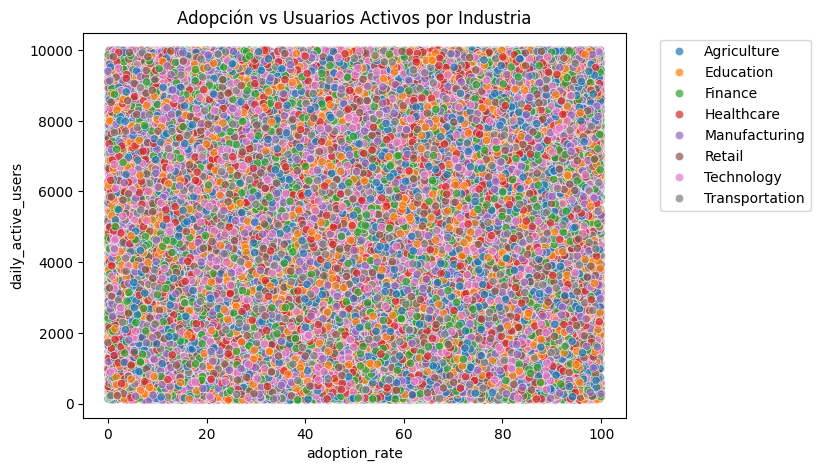

In [12]:
# Scatter plot que muestra la relacion entre adoption_rate y daily_active_users
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="adoption_rate", y="daily_active_users", hue="industry", alpha=0.7)
plt.title("Adopción vs Usuarios Activos por Industria")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-2944302173.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




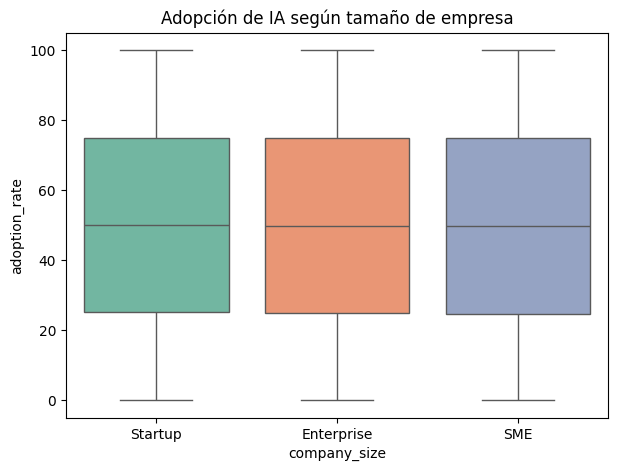

In [13]:
# Boxplot que muestra la Distribución de adoption_rate por tamaño de empresa
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="company_size", y="adoption_rate", palette="Set2")
plt.title("Adopción de IA según tamaño de empresa")
plt.show()

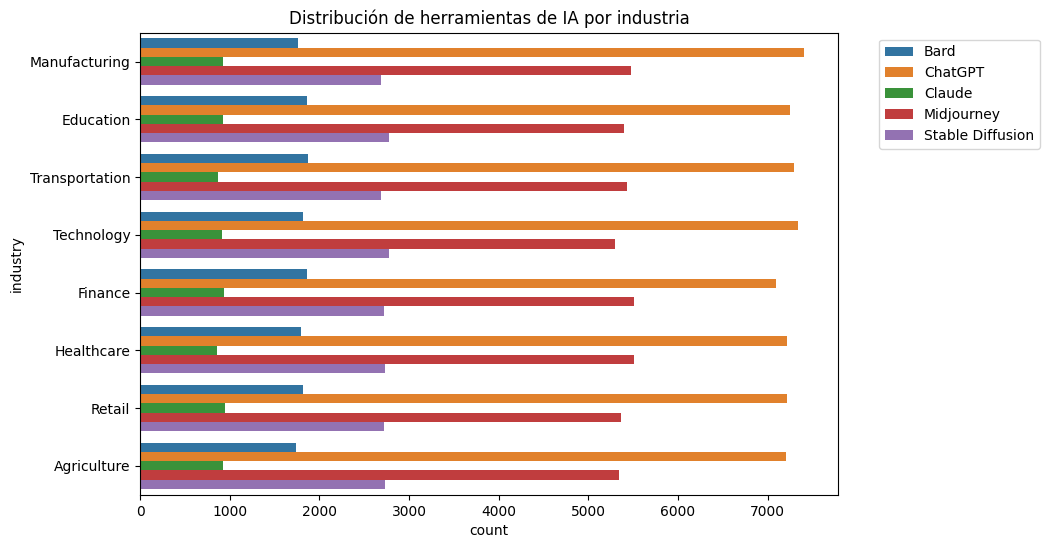

In [14]:
# Grafica de barras que muestra la distribucion de herramientas de IA por industria
plt.figure(figsize=(9,6))
sns.countplot(data=df, y="industry", hue="ai_tool", order=df["industry"].value_counts().index)
plt.title("Distribución de herramientas de IA por industria")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipython-input-1305693163.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




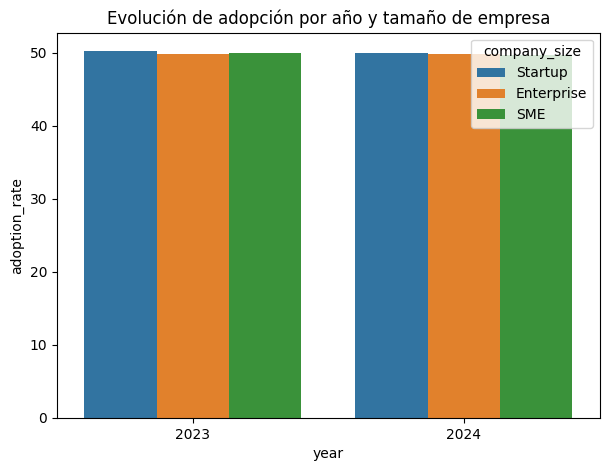

In [15]:
# Grafica de barras que muestra la evolución temporal (2023 vs 2024)
plt.figure(figsize=(7,5))
sns.barplot(data=df, x="year", y="adoption_rate", hue="company_size", ci=None)
plt.title("Evolución de adopción por año y tamaño de empresa")
plt.show()

/tmp/ipython-input-2626732246.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




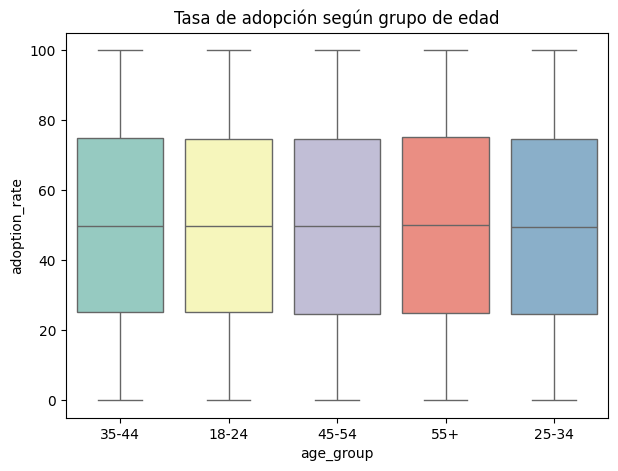

In [16]:
# BoxPlot que muestra la relación entre tasa de adopción y grupo de edad
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="age_group", y="adoption_rate", palette="Set3")
plt.title("Tasa de adopción según grupo de edad")
plt.show()

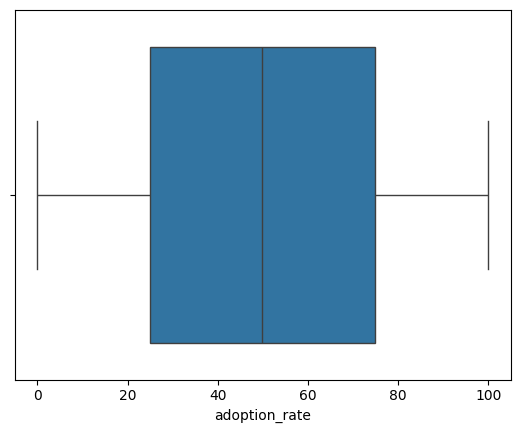

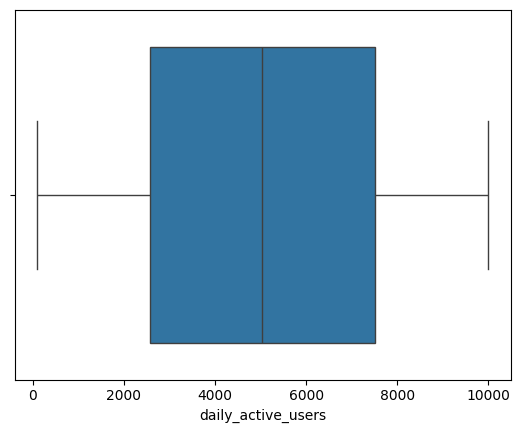

In [17]:
#Deteccion de outliers

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para detectar outliers
sns.boxplot(data=df, x="adoption_rate")
plt.show()

sns.boxplot(data=df, x="daily_active_users")
plt.show()

# Filtrado por rango lógico
df = df[(df["adoption_rate"] >= 0) & (df["adoption_rate"] <= 100)]
df = df[df["daily_active_users"] >= 0]  # no puede haber negativos

In [18]:
# Scatter 3D interactivo
fig = px.scatter_3d(
    df,
    x='industry',               # Industria en eje X (se puede codificar numérico si hay muchas)
    y='adoption_rate',           # Tasa de adopción en eje Y
    z='daily_active_users',      # Usuarios activos diarios en eje Z
    color='company_size',        # Color por tamaño de empresa
    symbol='ai_tool',            # Diferente símbolo según herramienta AI
    hover_data=['country','age_group'],  # Información extra al pasar el mouse
    size='daily_active_users',   # Tamaño de burbuja según engagement
    title='Mapa interactivo de adopción de IA por industria, tamaño de empresa y herramienta',
    width=1000,
    height=800
)

# Mostrar gráfico
fig.show()

Dado que no se identificaron outliers en el boxplot se procedio a identificar los valores extremos, para lo cual se filtraron el 5% del adoption rate mas bajo y mas alto. Se considera que los datos estan normalizados ya sea natural o artificialmente limitados

In [19]:
# Definir percentiles

lower_percentile = df["adoption_rate"].quantile(0.05)   # 5% más bajos
upper_percentile = df["adoption_rate"].quantile(0.95)   # 5% más altos

print(f"Adoption_rate bottom 5% < {lower_percentile:.2f}")
print(f"Adoption_rate top 5% > {upper_percentile:.2f}")

# Filtrar top y bottom 5%
df_bottom5 = df[df["adoption_rate"] <= lower_percentile].copy()
df_top5 = df[df["adoption_rate"] >= upper_percentile].copy()

# Ver tamaño de cada grupo

print("Número de empresas bottom 5%:", df_bottom5.shape[0])
print("Número de empresas top 5%:", df_top5.shape[0])


Adoption_rate bottom 5% < 4.96
Adoption_rate top 5% > 94.95
Número de empresas bottom 5%: 7254
Número de empresas top 5%: 7261


In [20]:
#Filtrado de informacion por año, industria, empresas con alta adopcion y por pais.
# Filtrar por año (solo 2024)
df_2024 = df[df["year"] == 2024]

# Filtrar por industria específica
df_healthcare = df[df["industry"] == "Healthcare"]

# Filtrar empresas grandes con alta adopción
df_enterprise_high = df[(df["company_size"] == "Enterprise") & (df["adoption_rate"] > 70)]

# Top 10 países con más registros
top_countries = df["country"].value_counts().head(10).index
df_top_countries = df[df["country"].isin(top_countries)]

print("Datos de 2024:",df_2024)
print("Datos filtrados por healthcare:",df_healthcare)
print("Datos filtrados por enterprise high:",df_enterprise_high)
print("Datos filtrados por paises:",df_top_countries)

Datos de 2024:           country        industry           ai_tool  adoption_rate  \
1          France   Manufacturing        Midjourney          35.72   
2       Australia  Transportation           ChatGPT          13.47   
4              UK     Agriculture  Stable Diffusion          34.06   
5          Brazil       Education        Midjourney          64.54   
8           China          Retail        Midjourney          39.90   
...           ...             ...               ...            ...   
144993    Germany          Retail  Stable Diffusion          85.08   
144994    Germany          Retail        Midjourney          88.81   
144996    Germany       Education        Midjourney          51.99   
144998        USA          Retail           ChatGPT          31.87   
144999     Canada      Technology            Claude          96.84   

        daily_active_users  year age_group company_size  
1                   8496.0  2024     18-24   Enterprise  
2                   8641.0  

In [21]:
import pandas as pd

# Filtrar bottom 5% de adopción
threshold = df["adoption_rate"].quantile(0.05)
df_bottom5 = df[df["adoption_rate"] <= threshold].copy()

# Agrupar por industria y ordenar dentro de cada grupo
df_bottom_by_industry = df_bottom5.sort_values(["industry", "adoption_rate"])

# Mostrar las 5 empresas más rezagadas por industria
for industry, group in df_bottom_by_industry.groupby("industry"):
    print(f"\nIndustria: {industry}")
    print(group[["country","ai_tool","adoption_rate","daily_active_users","company_size","age_group"]].head(5))


Industria: Agriculture
       country  ai_tool  adoption_rate  daily_active_users company_size  \
95194   France  ChatGPT           0.01              6095.0   Enterprise   
124538      UK     Bard           0.02               146.0      Startup   
32286   France  ChatGPT           0.03              9616.0          SME   
88983   Brazil  ChatGPT           0.03               808.0          SME   
100745   China  ChatGPT           0.03              1021.0      Startup   

       age_group  
95194      35-44  
124538     45-54  
32286        55+  
88983      18-24  
100745     18-24  

Industria: Education
            country     ai_tool  adoption_rate  daily_active_users  \
98339           USA  Midjourney           0.01              4540.0   
22043   South Korea  Midjourney           0.02              2332.0   
51770           USA     ChatGPT           0.02              2034.0   
81063         China     ChatGPT           0.02              3153.0   
108969       Brazil  Midjourney        

/tmp/ipython-input-892709338.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [22]:
# Definir top 5% de adopción
threshold_top = df["adoption_rate"].quantile(0.95)
df_top5 = df[df["adoption_rate"] >= threshold_top].copy()

print(f"Adoption_rate top 5% > {threshold_top:.2f}")
print("Número de empresas top 5%:", df_top5.shape[0])

# Agrupar por industria y ordenar dentro de cada grupo
df_top_by_industry = df_top5.sort_values(["industry", "adoption_rate"], ascending=[True, False])

# Mostrar las 5 empresas top por industria

for industry, group in df_top_by_industry.groupby("industry"):
    print(f"\nIndustria: {industry}")
    print(group[["country","ai_tool","adoption_rate","daily_active_users","company_size","age_group"]].head(5))

Adoption_rate top 5% > 94.95
Número de empresas top 5%: 7261

Industria: Agriculture
          country           ai_tool  adoption_rate  daily_active_users  \
19102       China  Stable Diffusion          99.99              5266.0   
50267      Canada        Midjourney          99.99               562.0   
90566       China        Midjourney          99.99              2556.0   
104363  Australia        Midjourney          99.99              8273.0   
76934   Australia        Midjourney          99.98              9821.0   

       company_size age_group  
19102       Startup       55+  
50267           SME     18-24  
90566           SME     35-44  
104363   Enterprise       55+  
76934    Enterprise     35-44  

Industria: Education
          country           ai_tool  adoption_rate  daily_active_users  \
25492   Australia           ChatGPT         100.00              9692.0   
38250       India  Stable Diffusion          99.99              4527.0   
46237     Germany           ChatGP

/tmp/ipython-input-1743955495.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



# **5. Análisis Exploratorio de los Datos**

## - Preguntas a responder
## Dado que se observo que todas las variables estaban balanceadas se busco analizar los valores extremos de la variable adoption_rate para encontrar tendencias sobre el resto de las variables a fin de identificar las industrias, paises, tamano de empresa, rango de edades de los usuarios, herramienta de AI que impactan a las empresas con la tasa de adopcion dentro del 5% superior y del 5% mas bajo.

## Con este analisis se buscaba responder a la preguntas:
##Que herramientas de AI son mas populares y bajo que escenarios?
##Que caracteristicas tienen las empresas cuya tasa de adopcion de herramientas de AI es cercana al 100%?

## - Estadísticas Empleadas, visualización y Resumen de las respuestas encontradas.

##Se aplico el comando df.info para conocer si existen datos nulos o faltantes y se observo que todas las columnas tienen 145,000 observaciones. Adicionalmente se uso el comando df.describe para analizar la estadistica descriptiva de los datos.

##Se utilizo un mapa de calor entre las variables adoption_rate, country e industry donde se observo que el sector de la agricultura es una de las industrias con mayor adopcion en varios paises; por otro lado se observo que en USA varios sectores como la educacion, salud, manufactura se han quedado rezagados en la adopcion de tecnologias de AI a diferencia de paises como Alemania o Australia que el mapa de calor muestra un fuerte impacto en la adopcion de AI.

#Ademas se utilizo un boxplot que muestra que no se identifican outliers tanto por rango de edades vs tasa de adopcion como tamano de empresa vs tasa de adopcion de las tecnologias de AI, de hecho los datos se muestra cerca de la media, en tanto que las graficas de barras muestran un comportamiento muy uniforme de las industrias respecto al uso de tecnologias de AI.

##Finalmente se utilizo un mapa interactivo de adopción de IA por industria, tamaño de empresa y herramienta que permite visualizar en 3D el comportamiento de las variables.

##Dado que no se identificaron outliers en el boxplot se procedio a identificar los valores extremos, para lo cual se filtraron el 5% del adoption rate mas bajo y mas alto. Se considera que los datos estan normalizados ya sea natural o artificialmente limitados



# **6. Análisis Predictivo**

## - Preprocesamiento para Análisis Predictivo: Problemas, Técnicas y Código

## - Modelado Predictivo
### - Modelo elegido y parámetros
### - Entrenamiento y Evaluación
## - Resultados


# **7. Conclusiones y Trabajos Futuros**

## Se buscara complementar los hallazgos de este analisis con los datos mostrados por la OECD usando como referencia el reporte "The Adoption of Artificial Intelligence in Firms" que aplico encuestas a empresas de diferentes sectores, paises, tamano de empleados; respecto al impacto en sus operaciones de herramientas de AI.

## - Resumen del trabajo realizado, hallazgos y posibles mejoras
## Dado que el dataset tiene datos muy balanceados y sin outliers no fue posible aplicar todas herramientas de limpieza de datos y depuracion de valores nulos, sin embargo se aplicaron herramientas de visualizacion que mostraron tendencias y relaciones entre los datos, lo cual permitio inferir relaciones entre las variables aun sin utilizar modelos de ML.

https://github.com/TonyProgramandoAndo/Revision-Proyecto-Sept-09